In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal #here we are using random normal initialization
from keras.models import Sequential #Here we are importing sequential models
from keras.layers import Dense, Activation #Here we are importing dense layers and activation functions
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Flatten

Using TensorFlow backend.


In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x,vy,ty,ax,colors = ['b']):#We will use this function to plot training loss and cross validation loss as a-
    # function of epoch
    #We are calling it a dynamic plot because as soon as each epoch is over, I want to update this plot
    ax.plot(x,vy,'b',label = 'Validation Loss')
    #x = number of epochs we want to run
    # vy = list of cross validation loss we got during each epoch
    # ty = list of training loss we got during each epoch
    # ax = labels for our x and y axis
    ax.plot(x,ty,'r',label = 'Train Loss')
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [4]:
(x_tr,y_tr),(x_test,y_test) = mnist.load_data() #loading train and test datasets

In [5]:
print(x_tr.shape) #it shows us the (number of datapoints in x_tr, shape of each datapoint(here it is (28,28)))
# x_tr.shape[0] = 60000
# x_tr.shape[1] = 28
# x_tr.shape[2] = 28

(60000, 28, 28)


In [6]:
print(x_test.shape)#it shows us the (number of datapoints in x_test, shape of each datapoint(here it is (28,28)))
# x_test.shape[0] = 10000
# x_test.shape[1] = 28
# x_test.shape[2] = 28

(10000, 28, 28)


In [7]:
#Now we will convert shape of each datapoint (image) in train and test from 28 x 28 to 1 x 784
x_tr = x_tr.reshape(x_tr.shape[0],x_tr.shape[1]*x_tr.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [8]:
print(x_tr.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
#An example of datapoint
x_tr[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [10]:
#Now we can see that each datapoint or image in our mnist dataset is a vector having dimensional values ranging from 0 to 255-
# Now we will normalize each of the datapoint in our mnist dataset
x_tr = x_tr/255
x_test = x_test/255

In [11]:
#an example of datapoint after normalizing
x_tr[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
#Now we will convert shape of each datapoint (image) in train and test from 28 x 28 to 1 x 784
x_tr = x_tr.reshape(x_tr.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [13]:
x_tr.shape

(60000, 28, 28, 1)

In [14]:
y_tr[0]

5

In [15]:
#Above we can see that our class label is a number. So lets now convert our clas label into a 10 dimensional vector.
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs
y_tr = np_utils.to_categorical(y_tr,10) #converting each class label in train dataset into a 10 dim vector. Here I am using-
#- np_utils for one-hot encoding.
y_test = np_utils.to_categorical(y_test,10)

In [16]:
y_tr[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
output_dim = 10 #indicates number of dimensions in output layer or number of ouputs coming out of output layer
input_dim = (x_tr.shape[1],x_tr.shape[2],x_tr.shape[3]) #indicates number of dimensions in input layer or number of inputs coming into input layer
batch_size = 128
nb_epoch = 20

In [18]:
model = Sequential()
model.add(Conv2D(filters = 20,kernel_size = (5,5),border_mode = 'same',input_shape = input_dim,activation = 'relu',kernel_initializer='glorot_normal',kernel_regularizer='l1'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))

model.add(Conv2D(filters = 20,kernel_size = (5,5),border_mode = 'same',input_shape = input_dim,activation = 'relu',kernel_initializer='glorot_normal',kernel_regularizer='l1'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))

model.add(Flatten())
model.add(Dense(500,activation = 'relu',kernel_initializer='glorot_normal'))

model.add(Dense(output_dim,activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 20)        10020     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 20)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 980)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               490500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total para

In [19]:
#defining the optimizer, loss function and metric
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [20]:
history = model.fit(x_tr,y_tr,batch_size = batch_size,epochs = nb_epoch,verbose = 1,validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 28s 468us/step - loss: 0.8213 - acc: 0.9149 - val_loss: 0.2885 - val_acc: 0.9627
Epoch 2/20
60000/60000 [==============================] - 25s 420us/step - loss: 0.2320 - acc: 0.9670 - val_loss: 0.2024 - val_acc: 0.9713
Epoch 3/20
60000/60000 [==============================] - 24s 398us/step - loss: 0.1893 - acc: 0.9748 - val_loss: 0.1705 - val_acc: 0.9778
Epoch 4/20
60000/60000 [==============================] - 24s 396us/step - loss: 0.1711 - acc: 0.9776 - val_loss: 0.1532 - val_acc: 0.9806
Epoch 5/20
60000/60000 [==============================] - 25s 411us/step - loss: 0.1566 - acc: 0.9798 - val_loss: 0.1449 - val_acc: 0.9817
Epoch 6/20
60000/60000 [==============================] - 24s 408us/step - loss: 0.1474 - acc: 0.9812 - val_loss: 0.1322 - val_acc: 0.9840
Epoch 7/20
60000/60000 [==============================] - 25s 412us/step - loss: 0.1382 - acc: 0.9825 - val_loss: 0.

10000/10000 [==============================] - 2s 236us/step
Test loss 0.09774911350011825
Test accuracy 0.9885


<IPython.core.display.Javascript object>


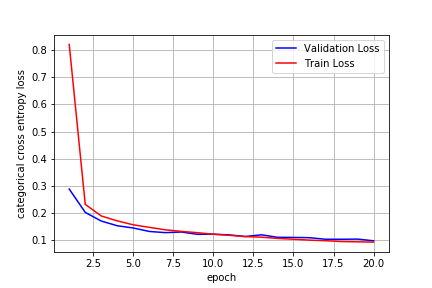

In [21]:
score = model.evaluate(x_test,y_test)
print('Test loss',score[0])
print('Test accuracy',score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');ax.set_ylabel('categorical cross entropy loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x,vy,ty,ax)